In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
bank = pd.read_csv('Bank Customer Churn Prediction.csv')
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
fitur_loc = ['customer_id', 'credit_score','country','gender']
fitur = ['customer_id', 'credit_score','country']
bank = bank.loc[:100,(fitur_loc)]

y = bank.gender

X = pd.get_dummies(bank[fitur], prefix=['country'], columns=['country'])


display(X)
display(y)

,customer_id,credit_score,country_France,country_Germany,country_Spain
0,15634602,619,1,0,0
1,15647311,608,0,0,1
2,15619304,502,1,0,0
3,15701354,699,1,0,0
4,15737888,850,0,0,1
...,...,...,...,...,...
96,15738721,773,0,0,1
97,15693683,814,0,1,0
98,15604348,710,0,0,1
99,15633059,413,1,0,0


0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
96       Male
97       Male
98       Male
99       Male
100    Female
Name: gender, Length: 101, dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.8558856  -0.1779418   1.13818037 -0.63464776 -0.61932354]
 [-0.67353566 -0.27527973 -0.87859537 -0.63464776  1.61466494]
 [-1.07538276 -1.21326345  1.13818037 -0.63464776 -0.61932354]
 [ 0.10187844  0.52997044  1.13818037 -0.63464776 -0.61932354]
 [ 0.62607174  1.86615478 -0.87859537 -0.63464776  1.61466494]]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train)
print("y Training:",y_train)

X Training:     customer_id  credit_score  country_France  country_Germany  country_Spain
80     15706021           665               1                0              0
91     15731511           808               1                0              0
68     15638424           661               0                1              0
51     15768193           585               0                1              0
27     15700772           571               1                0              0
..          ...           ...             ...              ...            ...
97     15693683           814               0                1              0
67     15641582           735               0                1              0
64     15592461           603               0                1              0
47     15771573           637               0                1              0
44     15684171           660               0                0              1

[70 rows x 5 columns]
y Training: 80    Female
91  

In [18]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [19]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female'
 'Male' 'Male' 'Male']


Akurasi : 51.61290322580645 %


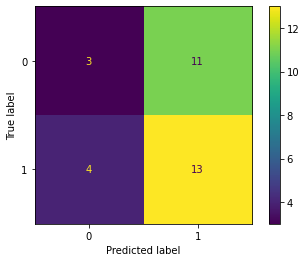

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))